# ***THYROID CANCER DETECTION (Risk + Diagnosis)***

In [18]:
# Basic Libraries
import pandas as pd
import numpy as np
import time
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, RobustScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Model Selection and Evaluation
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_val_predict, cross_validate
)
from sklearn.metrics import (
    accuracy_score, f1_score, make_scorer, confusion_matrix, classification_report
)

# Classification Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from xgboost import XGBClassifier, XGBRegressor

# Warnings and Display Options
warnings.simplefilter("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)


In [19]:
# Loading our dataset
file_path = "thyroid_cancer_risk_data.csv"
df = pd.read_csv(file_path)
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [21]:
# Checking if any columns have NULL values
df.isna().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,0


In [22]:
# Removing patient ID as it does not influence our results in any way
df = df.drop('Patient_ID', axis =1)
df.head(2)

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign


In [23]:
# Removing any duplicate rows that may be present
df.drop_duplicates()
df.shape

(212691, 16)

In [24]:
# Converting object columns to int using label encoder
le = LabelEncoder()
df['Family_History'] = le.fit_transform(df['Family_History'])
df['Radiation_Exposure'] = le.fit_transform(df['Radiation_Exposure'])
df['Iodine_Deficiency'] = le.fit_transform(df['Iodine_Deficiency'])
df['Smoking'] = le.fit_transform(df['Smoking'])
df['Obesity'] = le.fit_transform(df['Obesity'])
df['Diabetes'] = le.fit_transform(df['Diabetes'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head(2)

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,1,Russia,Caucasian,0,1,0,0,0,0,9.37,1.67,6.16,1.08,Low,Benign
1,29,1,Germany,Hispanic,0,1,0,0,0,0,1.83,1.73,10.54,4.05,Low,Benign


In [25]:
# Scaling numerical columns
numerical_values = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']

scaler = RobustScaler()
df[numerical_values] = scaler.fit_transform(df[numerical_values])

In [26]:
df.head(2)

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,0.368421,1,Russia,Caucasian,0,1,0,0,0,0,0.874747,-0.22,-0.554667,-0.569721,Low,Benign
1,-0.605263,1,Germany,Hispanic,0,1,0,0,0,0,-0.648485,-0.18,0.613333,0.613546,Low,Benign


In [27]:
# Checking unique values for our two prediction classes
print("Thyroid cancer risk unique values: ", df['Thyroid_Cancer_Risk'].unique())
print("Diagnosis unique values: ", df['Diagnosis'].unique())

Thyroid cancer risk unique values:  ['Low' 'Medium' 'High']
Diagnosis unique values:  ['Benign' 'Malignant']


In [28]:
# Converting them to numerical values
df['Thyroid_Cancer_Risk'] = le.fit_transform(df['Thyroid_Cancer_Risk'])
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])
df.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,0.368421,1,Russia,Caucasian,0,1,0,0,0,0,0.874747,-0.220000,-0.554667,-0.569721,1,0
1,-0.605263,1,Germany,Hispanic,0,1,0,0,0,0,-0.648485,-0.180000,0.613333,0.613546,1,0
2,0.894737,1,Nigeria,Caucasian,0,0,0,0,0,0,0.246465,0.393333,0.621333,0.836653,1,0
3,0.605263,0,India,Asian,0,0,0,0,0,0,-0.189899,0.413333,0.746667,-0.019920,2,0
4,-0.447368,0,Germany,African,1,1,0,0,0,0,0.820202,0.073333,0.658667,-0.159363,0,0


In [29]:
# Count unique values in Diagnosis
diagnosis_counts = df['Diagnosis'].value_counts()
print(diagnosis_counts)

# Count unique values in Thyroid_Cancer_Risk
risk_counts = df['Thyroid_Cancer_Risk'].value_counts()
print(risk_counts)

Diagnosis
0    163196
1     49495
Name: count, dtype: int64
Thyroid_Cancer_Risk
1    108388
2     72400
0     31903
Name: count, dtype: int64


In [30]:
# dealing with the multiple value columns

# drop first is true here to remove the first entry of gender and make just one new coulmn
df = pd.concat([df.drop('Gender', axis=1),
                pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)], axis=1)


# drop first is false because we need the first entry too
df = pd.concat([df.drop(['Country', 'Ethnicity'], axis=1),
                pd.get_dummies(df['Country'], prefix='Country', drop_first=False),
                pd.get_dummies(df['Ethnicity'], prefix='Ethnicity', drop_first=False)], axis=1)


df_encoded = df
df_encoded.head(5)


,Age,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis,Gender_1,Country_Brazil,Country_China,Country_Germany,Country_India,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_African,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern
0,0.368421,0,1,0,0,0,0,0.874747,-0.220000,-0.554667,-0.569721,1,0,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,-0.605263,0,1,0,0,0,0,-0.648485,-0.180000,0.613333,0.613546,1,0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
2,0.894737,0,0,0,0,0,0,0.246465,0.393333,0.621333,0.836653,1,0,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
3,0.605263,0,0,0,0,0,0,-0.189899,0.413333,0.746667,-0.019920,2,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4,-0.447368,1,1,0,0,0,0,0.820202,0.073333,0.658667,-0.159363,0,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


In [31]:
df.shape

(212691, 29)

# **CORRELATION**

**Finding the correlation between thyroid cancer risk and all other arrtibutes and similarly between diagnosis and all other attributes**

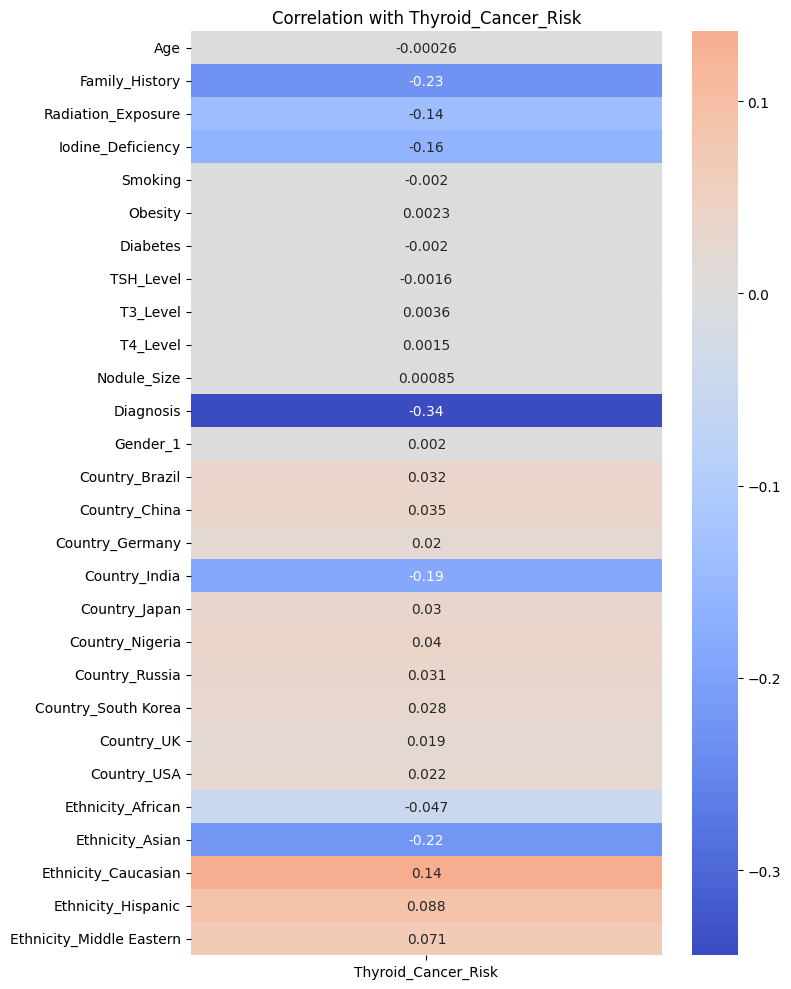

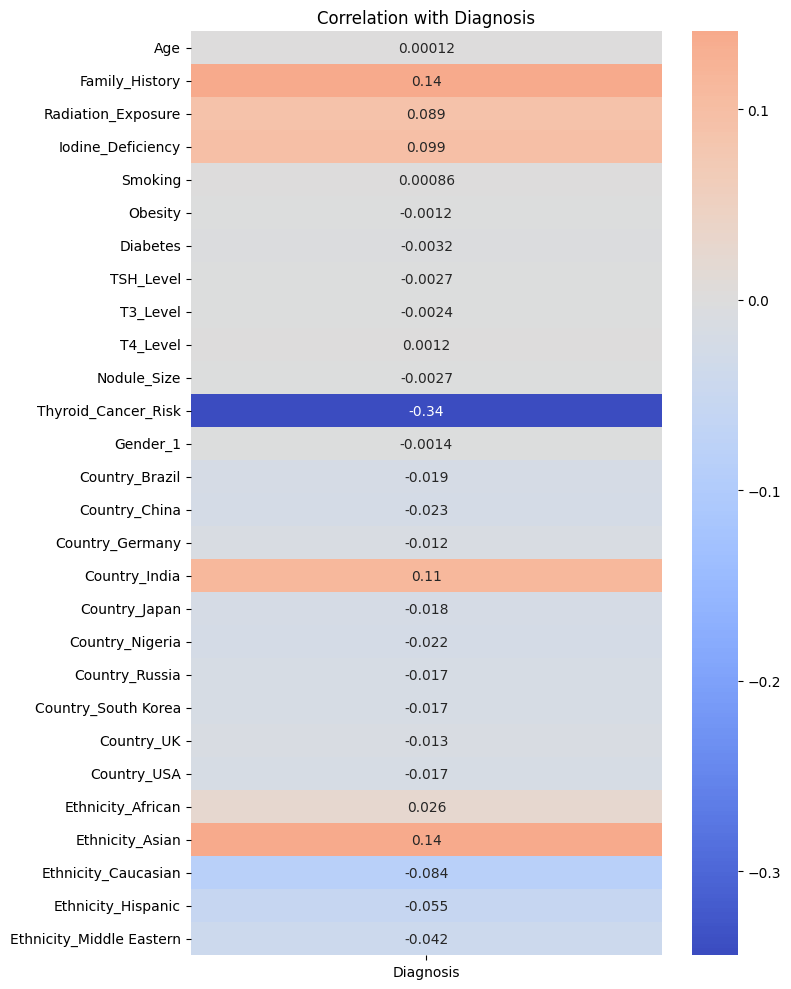

In [17]:
for target in ['Thyroid_Cancer_Risk', 'Diagnosis']:
    corr = df_encoded.corr()[[target]].drop(index=target)

    plt.figure(figsize=(8, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title(f"Correlation with {target}")
    plt.tight_layout()
    plt.show()


# **MODEL TRAINING**

In [18]:
# Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=2000),
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# input and output features
df_encoded = df.copy()
input_features = df_encoded.drop(['Thyroid_Cancer_Risk', 'Diagnosis'], axis=1)
output_thy_risk = df_encoded['Thyroid_Cancer_Risk']
output_diag = df_encoded['Diagnosis']

# 80/20 split for model validation
X_train, X_test, y_risk_train, y_risk_test, y_diag_train, y_diag_test = train_test_split(
    input_features, output_thy_risk, output_diag, test_size=0.2, random_state=42, stratify=output_thy_risk
)

for name, model in models.items():
    print(f"\nModel: {name}")

    # Step 1: Train & CV on Thyroid_Cancer_Risk using training set
    start_time = time.time()
    results_risk = cross_validate(
        model, X_train, y_risk_train, cv=5,
        scoring=['accuracy', 'f1_weighted'], return_train_score=True
    )
    model.fit(X_train, y_risk_train)
    train_time = time.time() - start_time

    # Evaluation on test set
    y_risk_pred_test = model.predict(X_test)

    print("Step 1: Thyroid_Cancer_Risk")
    print("CV Accuracy  -> train:", round(results_risk['train_accuracy'].mean(), 4), "| val:", round(results_risk['test_accuracy'].mean(), 4))
    print("CV F1-score  -> train:", round(results_risk['train_f1_weighted'].mean(), 4), "| val:", round(results_risk['test_f1_weighted'].mean(), 4))
    print("Test Accuracy:", round(model.score(X_test, y_risk_test), 4))
    print("Train time: ", round(train_time, 2), "seconds")

    # Step 2: Use predicted risk to augment features
    full_predicted_risk = model.predict(input_features).reshape(-1, 1)
    updated_input_features = np.concatenate([input_features, full_predicted_risk], axis=1)
    X_train_diag = updated_input_features[X_train.index]
    X_test_diag = updated_input_features[X_test.index]

    # Step 2: Train & CV on Diagnosis using updated input
    start_time = time.time()
    results_diag = cross_validate(
        model, X_train_diag, y_diag_train, cv=5,
        scoring=['accuracy', 'f1_weighted'], return_train_score=True
    )
    model.fit(X_train_diag, y_diag_train)
    train_time = time.time() - start_time

    y_diag_pred_test = model.predict(X_test_diag)

    print("\nStep 2: Diagnosis")
    print("CV Accuracy  -> train:", round(results_diag['train_accuracy'].mean(), 4), "| val:", round(results_diag['test_accuracy'].mean(), 4))
    print("CV F1-score  -> train:", round(results_diag['train_f1_weighted'].mean(), 4), "| val:", round(results_diag['test_f1_weighted'].mean(), 4))
    print("Test Accuracy:", round(model.score(X_test_diag, y_diag_test), 4))
    print("Train time: ", round(train_time, 2), "seconds")

    print("\n\n--------------------------\n\n")



Model: LogisticRegression
Step 1: Thyroid_Cancer_Risk
CV Accuracy  -> train: 0.6064 | val: 0.6059
CV F1-score  -> train: 0.4837 | val: 0.4833
Test Accuracy: 0.6067
Train time:  11.17 seconds

Step 2: Diagnosis
CV Accuracy  -> train: 0.7903 | val: 0.7903
CV F1-score  -> train: 0.7738 | val: 0.7738
Test Accuracy: 0.7889
Train time:  6.78 seconds


--------------------------



Model: RandomForest
Step 1: Thyroid_Cancer_Risk
CV Accuracy  -> train: 1.0 | val: 0.6381
CV F1-score  -> train: 1.0 | val: 0.5769
Test Accuracy: 0.6363
Train time:  191.01 seconds

Step 2: Diagnosis
CV Accuracy  -> train: 1.0 | val: 0.8261
CV F1-score  -> train: 1.0 | val: 0.811
Test Accuracy: 0.8266
Train time:  181.9 seconds


--------------------------



Model: AdaBoost
Step 1: Thyroid_Cancer_Risk
CV Accuracy  -> train: 0.5707 | val: 0.5707
CV F1-score  -> train: 0.4498 | val: 0.4498
Test Accuracy: 0.57
Train time:  30.41 seconds

Step 2: Diagnosis
CV Accuracy  -> train: 0.7768 | val: 0.7765
CV F1-score  -> tr

# Based on these outputs, Random forest has the best output but has the longest rutime too. Now I will train some more complex *models*

***BASIC LDA MODEL***

In [19]:
# input and output features
df_encoded = df.copy()
input_features = df_encoded.drop(['Thyroid_Cancer_Risk', 'Diagnosis'], axis=1)
output_thy_risk = df_encoded['Thyroid_Cancer_Risk']
output_diag = df_encoded['Diagnosis']

# spliting the dataset
X_train_input_risk, X_test_input_risk, y_train_output_risk, y_test_output_risk = train_test_split(input_features, output_thy_risk, test_size=0.2, random_state=42)

#training LDA model for thyroid risk
start_time = time.time()
lda_risk = LDA()
lda_risk.fit(X_train_input_risk, y_train_output_risk)
train_time = time.time() - start_time

predicted_risk = lda_risk.predict(X_test_input_risk)

# predicting model output to append in the input features for next model
pred_risk_all = lda_risk.predict(input_features)

acc_risk = accuracy_score(y_test_output_risk, predicted_risk)
f1_risk = f1_score(y_test_output_risk, predicted_risk, average='weighted')

print("Step 1: Thyroid_Cancer_Risk")
print("Accuracy: ", round(acc_risk, 4))
print("F1-score: ", round(f1_risk, 4))
print("Train time: ", round(train_time, 2), "seconds\n")

# appending results of first model to input features for seconf model
Concat_input_features = np.concatenate([input_features, pred_risk_all.reshape(-1, 1)], axis=1)
X_train_c_input_diag, X_test_c_input_diag, y_train_output_diag, y_test_output_diag = train_test_split(Concat_input_features, output_diag, test_size=0.2, random_state=42)

# Training the model for diagnosis prediction
start_time = time.time()
lda_diag = LDA()
lda_diag.fit(X_train_c_input_diag, y_train_output_diag)
train_time = time.time() - start_time

predicted_diagnosis = lda_diag.predict(X_test_c_input_diag)

acc_diag = accuracy_score(y_test_output_diag, predicted_diagnosis)
f1_diag = f1_score(y_test_output_diag, predicted_diagnosis, average='weighted')

print("Step 2: Diagnosis")
print("Accuracy: ", round(acc_diag, 4))
print("F1-score: ", round(f1_diag, 4))
print("Train time: ", round(train_time, 2), "seconds")


Step 1: Thyroid_Cancer_Risk
Accuracy:  0.6097
F1-score:  0.4868
Train time:  0.38 seconds

Step 2: Diagnosis
Accuracy:  0.791
F1-score:  0.7751
Train time:  0.62 seconds


***LDA Model with Stratified KFold cross validation***



In [20]:
# Input and output features
df_encoded = df.copy()
input_features = df_encoded.drop(['Thyroid_Cancer_Risk', 'Diagnosis'], axis=1)
output_thy_risk = df_encoded['Thyroid_Cancer_Risk']
output_diag = df_encoded['Diagnosis']

# Split dataset into 80% training and 20% testing
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(
    input_features, output_thy_risk, test_size=0.2, stratify=output_thy_risk, random_state=42
)

# Stratified KFold CV setup
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# Step 1: Train LDA model for Thyroid_Cancer_Risk on 80% using CV
lda_risk = LDA()
start_time = time.time()
predicted_thyroid_risk_cv = cross_val_predict(lda_risk, X_train_risk, y_train_risk, cv=cv)
train_time_risk = time.time() - start_time

# Train final model on all 80% training data and evaluate on 20% test set
lda_risk.fit(X_train_risk, y_train_risk)
predicted_thyroid_risk_test = lda_risk.predict(X_test_risk)

acc_risk = accuracy_score(y_test_risk, predicted_thyroid_risk_test)
f1_risk = f1_score(y_test_risk, predicted_thyroid_risk_test, average='weighted')

print("Step 1: Thyroid_Cancer_Risk")
print("Test Accuracy: ", round(acc_risk, 4))
print("Test F1-score: ", round(f1_risk, 4))
print("Train time: ", round(train_time_risk, 2), "seconds")

# Step 2: Append predicted thyroid risk (for all original inputs) to inputs for diagnosis
# First get predictions for the full dataset using trained model
pred_risk_all = lda_risk.predict(input_features)
concat_input_features = np.concatenate([input_features, pred_risk_all.reshape(-1, 1)], axis=1)

# Split diagnosis dataset into 80% training and 20% test
X_train_diag, X_test_diag, y_train_diag, y_test_diag = train_test_split(
    concat_input_features, output_diag, test_size=0.2, stratify=output_diag, random_state=42
)

# Step 2: Train LDA model for Diagnosis on 80% using CV
lda_diag = LDA()
start_time = time.time()
predicted_diag_cv = cross_val_predict(lda_diag, X_train_diag, y_train_diag, cv=cv)
train_time_diag = time.time() - start_time

# Train final model and evaluate on 20% test set
lda_diag.fit(X_train_diag, y_train_diag)
predicted_diagnosis_test = lda_diag.predict(X_test_diag)

acc_diag = accuracy_score(y_test_diag, predicted_diagnosis_test)
f1_diag = f1_score(y_test_diag, predicted_diagnosis_test, average='weighted')

print("Step 2: Diagnosis")
print("Test Accuracy: ", round(acc_diag, 4))
print("Test F1-score: ", round(f1_diag, 4))
print("Train time: ", round(train_time_diag, 2), "seconds")


Step 1: Thyroid_Cancer_Risk
Test Accuracy:  0.6054
Test F1-score:  0.4828
Train time:  3.0 seconds
Step 2: Diagnosis
Test Accuracy:  0.7902
Test F1-score:  0.7737
Train time:  4.28 seconds


***XGBBoost with cross validate value 6 and random over sampler***

In [21]:
# Input and output features
df_encoded = df.copy()
input_features = df_encoded.drop(['Thyroid_Cancer_Risk', 'Diagnosis'], axis=1)
output_thy_risk = df_encoded['Thyroid_Cancer_Risk']
output_diag = df_encoded['Diagnosis']

# Split dataset into 80% training and 20% testing
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(
    input_features, output_thy_risk, test_size=0.2, stratify=output_thy_risk, random_state=42
)

# Apply random oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train_risk_resampled, y_train_risk_resampled = ros.fit_resample(X_train_risk, y_train_risk)

# Training XGBClassifier with cross-validation for thyroid cancer risk
clf_risk = XGBClassifier(eval_metric='mlogloss')
start_time = time.time()
cv_results_risk = cross_validate(clf_risk, X_train_risk_resampled, y_train_risk_resampled, cv=6, scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted'}, return_train_score=True)
train_time = time.time() - start_time

# Train final model and evaluate on test data
clf_risk.fit(X_train_risk_resampled, y_train_risk_resampled)
predicted_risk_test = clf_risk.predict(X_test_risk)

acc_risk = accuracy_score(y_test_risk, predicted_risk_test)
f1_risk = f1_score(y_test_risk, predicted_risk_test, average='weighted')

print("Step 1: Thyroid_Cancer_Risk")
print("CV Accuracy:  train:", round(cv_results_risk['train_accuracy'].mean(), 4), "| val:", round(cv_results_risk['test_accuracy'].mean(), 4))
print("CV F1-score:  train:", round(cv_results_risk['train_f1'].mean(), 4), "| val:", round(cv_results_risk['test_f1'].mean(), 4))
print("Test Accuracy:", round(acc_risk, 4))
print("Test F1-score:", round(f1_risk, 4))
print("Train time:", round(train_time, 2), "seconds\n")

# Append predicted cancer risk into the dataset for second prediciton
pred_risk_all = clf_risk.predict(input_features)
concat_input_features = np.concatenate([input_features, pred_risk_all.reshape(-1, 1)], axis=1)

# Split dataset into 80% training and 20% testing
X_train_diag, X_test_diag, y_train_diag, y_test_diag = train_test_split(
    concat_input_features, output_diag, test_size=0.2, stratify=output_diag, random_state=42
)

# Oversample the diagnosis training data
X_train_diag_resampled, y_train_diag_resampled = ros.fit_resample(X_train_diag, y_train_diag)

# Training the second model for thyroid cancer diagnosis
clf_diag = XGBClassifier(eval_metric='mlogloss')
start_time = time.time()
cv_results_diag = cross_validate(clf_diag, X_train_diag_resampled, y_train_diag_resampled, cv=6, scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted'}, return_train_score=True)
train_time = time.time() - start_time

# Evaluate the trained model to predict on test data
clf_diag.fit(X_train_diag_resampled, y_train_diag_resampled)
predicted_diag_test = clf_diag.predict(X_test_diag)

acc_diag = accuracy_score(y_test_diag, predicted_diag_test)
f1_diag = f1_score(y_test_diag, predicted_diag_test, average='weighted')

print("Step 2: Diagnosis")
print("CV Accuracy:  train:", round(cv_results_diag['train_accuracy'].mean(), 4), "| val:", round(cv_results_diag['test_accuracy'].mean(), 4))
print("CV F1-score:  train:", round(cv_results_diag['train_f1'].mean(), 4), "| val:", round(cv_results_diag['test_f1'].mean(), 4))
print("Test Accuracy:", round(acc_diag, 4))
print("Test F1-score:", round(f1_diag, 4))
print("Train time:", round(train_time, 2), "seconds")


Step 1: Thyroid_Cancer_Risk
CV Accuracy:  train: 0.773 | val: 0.6987
CV F1-score:  train: 0.773 | val: 0.6983
Test Accuracy: 0.5788
Test F1-score: 0.5825
Train time: 51.36 seconds

Step 2: Diagnosis
CV Accuracy:  train: 0.736 | val: 0.7171
CV F1-score:  train: 0.7259 | val: 0.7059
Test Accuracy: 0.8127
Test F1-score: 0.8025
Train time: 21.62 seconds


***Random forest classifier with Random over sampler and cross validation value of 6***

---



In [22]:
# input and output features
df_encoded = df.copy()
input_features = df_encoded.drop(['Thyroid_Cancer_Risk', 'Diagnosis'], axis=1)
output_thy_risk = df_encoded['Thyroid_Cancer_Risk']
output_diag = df_encoded['Diagnosis']

# Split the data on 80% training and 20% testing
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(
    input_features, output_thy_risk, test_size=0.2, stratify=output_thy_risk, random_state=42
)

# Oversample only the training data
ros = RandomOverSampler(random_state=42)
X_train_risk_resampled, y_train_risk_resampled = ros.fit_resample(X_train_risk, y_train_risk)

# Cross-validation on oversampled training data
rfc_risk = RandomForestClassifier(random_state=42)
start_time = time.time()
cv_results_risk = cross_validate( rfc_risk, X_train_risk_resampled, y_train_risk_resampled, cv=6, scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted'}, return_train_score=True)
train_time = time.time() - start_time

# Train model and evaluate on test data
rfc_risk.fit(X_train_risk_resampled, y_train_risk_resampled)
predicted_risk_test = rfc_risk.predict(X_test_risk)

acc_risk = accuracy_score(y_test_risk, predicted_risk_test)
f1_risk = f1_score(y_test_risk, predicted_risk_test, average='weighted')

print("Step 1: Thyroid_Cancer_Risk")
print("CV Accuracy:  train:", round(cv_results_risk['train_accuracy'].mean(), 4), "| val:", round(cv_results_risk['test_accuracy'].mean(), 4))
print("CV F1-score:  train:", round(cv_results_risk['train_f1'].mean(), 4), "| val:", round(cv_results_risk['test_f1'].mean(), 4))
print("Test Accuracy:", round(acc_risk, 4))
print("Test F1-score:", round(f1_risk, 4))
print("Train time:", round(train_time, 2), "seconds\n")

# predict and append the appended code into the dataset and train for the second model
pred_risk_all = rfc_risk.predict(input_features)
concat_input_features = np.concatenate([input_features, pred_risk_all.reshape(-1, 1)], axis=1)

# Split the dataset in 80% training and 20% testing
X_train_diag, X_test_diag, y_train_diag, y_test_diag = train_test_split(
    concat_input_features, output_diag, test_size=0.2, stratify=output_diag, random_state=42
)

# Oversample only training data
X_train_diag_resampled, y_train_diag_resampled = ros.fit_resample(X_train_diag, y_train_diag)

# Cross-validation on oversampled diagnosis training data
rfc_diag = RandomForestClassifier(random_state=42)
start_time = time.time()
cv_results_diag = cross_validate(rfc_diag, X_train_diag_resampled,y_train_diag_resampled, cv=6, scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted'}, return_train_score=True)
train_time = time.time() - start_time

# Evaluate the model on testing data
rfc_diag.fit(X_train_diag_resampled, y_train_diag_resampled)
predicted_diag_test = rfc_diag.predict(X_test_diag)

acc_diag = accuracy_score(y_test_diag, predicted_diag_test)
f1_diag = f1_score(y_test_diag, predicted_diag_test, average='weighted')

print("Step 2: Diagnosis")
print("CV Accuracy:  train:", round(cv_results_diag['train_accuracy'].mean(), 4), "| val:", round(cv_results_diag['test_accuracy'].mean(), 4))
print("CV F1-score:  train:", round(cv_results_diag['train_f1'].mean(), 4), "| val:", round(cv_results_diag['test_f1'].mean(), 4))
print("Test Accuracy:", round(acc_diag, 4))
print("Test F1-score:", round(f1_diag, 4))
print("Train time:", round(train_time, 2), "seconds")


Step 1: Thyroid_Cancer_Risk
CV Accuracy:  train: 1.0 | val: 0.808
CV F1-score:  train: 1.0 | val: 0.8047
Test Accuracy: 0.6179
Test F1-score: 0.5853
Train time: 242.76 seconds

Step 2: Diagnosis
CV Accuracy:  train: 1.0 | val: 0.9606
CV F1-score:  train: 1.0 | val: 0.9605
Test Accuracy: 0.8286
Test F1-score: 0.8144
Train time: 276.96 seconds


Random forest classifier with Random over sampler and cross validation value of 10

In [23]:
# input and output features
df_encoded = df.copy()
input_features = df_encoded.drop(['Thyroid_Cancer_Risk', 'Diagnosis'], axis=1)
output_thy_risk = df_encoded['Thyroid_Cancer_Risk']
output_diag = df_encoded['Diagnosis']

# Split the data on 80% training and 20% testing
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(
    input_features, output_thy_risk, test_size=0.2, stratify=output_thy_risk, random_state=42
)

# Oversample only the training data
ros = RandomOverSampler(random_state=42)
X_train_risk_resampled, y_train_risk_resampled = ros.fit_resample(X_train_risk, y_train_risk)

# Cross-validation on oversampled training data
rfc_risk = RandomForestClassifier(random_state=42)
start_time = time.time()
cv_results_risk = cross_validate( rfc_risk, X_train_risk_resampled, y_train_risk_resampled, cv=10, scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted'}, return_train_score=True)
train_time = time.time() - start_time

# Train model and evaluate on test data
rfc_risk.fit(X_train_risk_resampled, y_train_risk_resampled)
predicted_risk_test = rfc_risk.predict(X_test_risk)

acc_risk = accuracy_score(y_test_risk, predicted_risk_test)
f1_risk = f1_score(y_test_risk, predicted_risk_test, average='weighted')

print("Step 1: Thyroid_Cancer_Risk")
print("CV Accuracy:  train:", round(cv_results_risk['train_accuracy'].mean(), 4), "| val:", round(cv_results_risk['test_accuracy'].mean(), 4))
print("CV F1-score:  train:", round(cv_results_risk['train_f1'].mean(), 4), "| val:", round(cv_results_risk['test_f1'].mean(), 4))
print("Test Accuracy:", round(acc_risk, 4))
print("Test F1-score:", round(f1_risk, 4))
print("Train time:", round(train_time, 2), "seconds\n")

# predict and append the appended code into the dataset and train for the second model
pred_risk_all = rfc_risk.predict(input_features)
concat_input_features = np.concatenate([input_features, pred_risk_all.reshape(-1, 1)], axis=1)

# Split the dataset in 80% training and 20% testing
X_train_diag, X_test_diag, y_train_diag, y_test_diag = train_test_split(
    concat_input_features, output_diag, test_size=0.2, stratify=output_diag, random_state=42
)

# Oversample only training data
X_train_diag_resampled, y_train_diag_resampled = ros.fit_resample(X_train_diag, y_train_diag)

# Cross-validation on oversampled diagnosis training data
rfc_diag = RandomForestClassifier(random_state=42)
start_time = time.time()
cv_results_diag = cross_validate(rfc_diag, X_train_diag_resampled,y_train_diag_resampled, cv=10, scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted'}, return_train_score=True)
train_time = time.time() - start_time

# Evaluate the model on testing data
rfc_diag.fit(X_train_diag_resampled, y_train_diag_resampled)
predicted_diag_test = rfc_diag.predict(X_test_diag)

acc_diag = accuracy_score(y_test_diag, predicted_diag_test)
f1_diag = f1_score(y_test_diag, predicted_diag_test, average='weighted')

print("Step 2: Diagnosis")
print("CV Accuracy:  train:", round(cv_results_diag['train_accuracy'].mean(), 4), "| val:", round(cv_results_diag['test_accuracy'].mean(), 4))
print("CV F1-score:  train:", round(cv_results_diag['train_f1'].mean(), 4), "| val:", round(cv_results_diag['test_f1'].mean(), 4))
print("Test Accuracy:", round(acc_diag, 4))
print("Test F1-score:", round(f1_diag, 4))
print("Train time:", round(train_time, 2), "seconds")


Step 1: Thyroid_Cancer_Risk
CV Accuracy:  train: 1.0 | val: 0.8131
CV F1-score:  train: 1.0 | val: 0.8104
Test Accuracy: 0.6179
Test F1-score: 0.5853
Train time: 446.53 seconds

Step 2: Diagnosis
CV Accuracy:  train: 1.0 | val: 0.9616
CV F1-score:  train: 1.0 | val: 0.9616
Test Accuracy: 0.8286
Test F1-score: 0.8144
Train time: 495.01 seconds


***Desicion Tree with bagging classifier***

In [24]:
# input and output data
df_encoded = df.copy()
input_features = df_encoded.drop(['Thyroid_Cancer_Risk', 'Diagnosis'], axis=1)
output_thy_risk = df_encoded['Thyroid_Cancer_Risk']
output_diag = df_encoded['Diagnosis']

# Split the dataset in 80% training and 20% testing
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(
    input_features, output_thy_risk, test_size=0.2, stratify=output_thy_risk, random_state=42
)

# Apply RandomOverSampler only to training data
ros = RandomOverSampler(random_state=42)
X_train_risk_resampled, y_train_risk_resampled = ros.fit_resample(X_train_risk, y_train_risk)

# Training the model for thyroid cancer risk predicition
dt = DecisionTreeClassifier(random_state=42)
bc_risk = BaggingClassifier(estimator=dt, n_estimators=10, random_state=42)
start_time = time.time()
cv_results_risk = cross_validate(bc_risk, X_train_risk_resampled, y_train_risk_resampled, cv=6, scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted'}, return_train_score=True )
train_time = time.time() - start_time

# EValuate the model on testing data
bc_risk.fit(X_train_risk_resampled, y_train_risk_resampled)
predicted_risk_test = bc_risk.predict(X_test_risk)

acc_risk = accuracy_score(y_test_risk, predicted_risk_test)
f1_risk = f1_score(y_test_risk, predicted_risk_test, average='weighted')

print("Step 1: Thyroid_Cancer_Risk")
print("CV Accuracy:  train:", round(cv_results_risk['train_accuracy'].mean(), 4), "| val:", round(cv_results_risk['test_accuracy'].mean(), 4))
print("CV F1-score:  train:", round(cv_results_risk['train_f1'].mean(), 4), "| val:", round(cv_results_risk['test_f1'].mean(), 4))
print("Test Accuracy:", round(acc_risk, 4))
print("Test F1-score:", round(f1_risk, 4))
print("Train time:", round(train_time, 2), "seconds\n")

# Appened the predicted risk into the data for diagnosis detection
pred_risk_all = bc_risk.predict(input_features)
concat_input_features = np.concatenate([input_features, pred_risk_all.reshape(-1, 1)], axis=1)

# Spliting the dataset into 80% train and 20% test
X_train_diag, X_test_diag, y_train_diag, y_test_diag = train_test_split(
    concat_input_features, output_diag, test_size=0.2, stratify=output_diag, random_state=42
)

# Apply RandomOverSampler only to training data
X_train_diag_resampled, y_train_diag_resampled = ros.fit_resample(X_train_diag, y_train_diag)

# Train model for thyroid cancer diagnosis
bc_diag = BaggingClassifier(estimator=dt, n_estimators=9, random_state=42)

start_time = time.time()
cv_results_diag = cross_validate(bc_diag, X_train_diag_resampled, y_train_diag_resampled, cv=6, scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted'}, return_train_score=True)
train_time = time.time() - start_time

# Evaluate the trained model on test dataset
bc_diag.fit(X_train_diag_resampled, y_train_diag_resampled)
predicted_diag_test = bc_diag.predict(X_test_diag)

acc_diag = accuracy_score(y_test_diag, predicted_diag_test)
f1_diag = f1_score(y_test_diag, predicted_diag_test, average='weighted')

print("Step 2: Diagnosis")
print("CV Accuracy:  train:", round(cv_results_diag['train_accuracy'].mean(), 4), "| val:", round(cv_results_diag['test_accuracy'].mean(), 4))
print("CV F1-score:  train:", round(cv_results_diag['train_f1'].mean(), 4), "| val:", round(cv_results_diag['test_f1'].mean(), 4))
print("Test Accuracy:", round(acc_diag, 4))
print("Test F1-score:", round(f1_diag, 4))
print("Train time:", round(train_time, 2), "seconds")


Step 1: Thyroid_Cancer_Risk
CV Accuracy:  train: 0.9929 | val: 0.801
CV F1-score:  train: 0.9929 | val: 0.7986
Test Accuracy: 0.6161
Test F1-score: 0.5954
Train time: 90.97 seconds

Step 2: Diagnosis
CV Accuracy:  train: 0.996 | val: 0.933
CV F1-score:  train: 0.996 | val: 0.9329
Test Accuracy: 0.8003
Test F1-score: 0.7887
Train time: 162.31 seconds


***Lets Try Random forest with attribute selection based on the correlation we got.***

In [25]:
# input features
df_encoded = df.copy()
input_features = df_encoded.drop(['Thyroid_Cancer_Risk', 'Diagnosis', 'Age', 'Gender_1', 'Nodule_Size'], axis=1)
output_thy_risk = df_encoded['Thyroid_Cancer_Risk']

# Split into training and testing sets
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(
    input_features, output_thy_risk, test_size=0.2, stratify=output_thy_risk, random_state=42
)

# Oversample only training set
ros = RandomOverSampler(random_state=42)
X_train_risk_resampled, y_train_risk_resampled = ros.fit_resample(X_train_risk, y_train_risk)

# Train the model for thyroid cancer predicition
rfc_risk = RandomForestClassifier(random_state=42)
start_time = time.time()
cv_results_risk = cross_validate(rfc_risk,X_train_risk_resampled, y_train_risk_resampled,cv=6, scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted'}, return_train_score=True)
train_time = time.time() - start_time

# predict on the testing dataset
rfc_risk.fit(X_train_risk_resampled, y_train_risk_resampled)
y_pred_risk_test = rfc_risk.predict(X_test_risk)

acc_risk = accuracy_score(y_test_risk, y_pred_risk_test)
f1_risk = f1_score(y_test_risk, y_pred_risk_test, average='weighted')

print("Step 1: Thyroid_Cancer_Risk")
print("CV Accuracy:  train:", round(cv_results_risk['train_accuracy'].mean(), 4), "| val:", round(cv_results_risk['test_accuracy'].mean(), 4))
print("CV F1-score:  train:", round(cv_results_risk['train_f1'].mean(), 4), "| val:", round(cv_results_risk['test_f1'].mean(), 4))
print("Test Accuracy:", round(acc_risk, 4))
print("Test F1-score:", round(f1_risk, 4))
print("Train time:", round(train_time, 2), "seconds")

# Reassign input features
input_features = df_encoded.drop(['Diagnosis', 'Age', 'Gender_1', 'Obesity', 'Diabetes'], axis=1).values
y_diag = df_encoded['Diagnosis']

# Append the predicited data into the dataset
predicted_risk_all = rfc_risk.predict(input_features)
concat_input_features = np.concatenate([input_features, predicted_risk_all.reshape(-1, 1)], axis=1)

# Split data into 80% training and 20% testing
X_train_diag, X_test_diag, y_train_diag, y_test_diag = train_test_split(
    concat_input_features, y_diag, test_size=0.2, stratify=y_diag, random_state=42
)

# USe oversapmler on ttesting data
X_train_diag_resampled, y_train_diag_resampled = ros.fit_resample(X_train_diag, y_train_diag)

# Train model for thryoid diagnosis predicition
rfc_diag = RandomForestClassifier(random_state=42)
start_time = time.time()
cv_results_diag = cross_validate(rfc_diag, X_train_diag_resampled, y_train_diag_resampled, cv=6, scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted'}, return_train_score=True)
train_time = time.time() - start_time

# EValuate the model on the training dataset
rfc_diag.fit(X_train_diag_resampled, y_train_diag_resampled)
y_pred_diag_test = rfc_diag.predict(X_test_diag)

acc_diag = accuracy_score(y_test_diag, y_pred_diag_test)
f1_diag = f1_score(y_test_diag, y_pred_diag_test, average='weighted')

print("\nStep 2: Diagnosis")
print("CV Accuracy:  train:", round(cv_results_diag['train_accuracy'].mean(), 4), "| val:", round(cv_results_diag['test_accuracy'].mean(), 4))
print("CV F1-score:  train:", round(cv_results_diag['train_f1'].mean(), 4), "| val:", round(cv_results_diag['test_f1'].mean(), 4))
print("Test Accuracy:", round(acc_diag, 4))
print("Test F1-score:", round(f1_diag, 4))
print("Train time:", round(train_time, 2), "seconds")


Step 1: Thyroid_Cancer_Risk
CV Accuracy:  train: 1.0 | val: 0.7931
CV F1-score:  train: 1.0 | val: 0.7912
Test Accuracy: 0.6048
Test F1-score: 0.5947
Train time: 203.47 seconds

Step 2: Diagnosis
CV Accuracy:  train: 1.0 | val: 0.9577
CV F1-score:  train: 1.0 | val: 0.9577
Test Accuracy: 0.8257
Test F1-score: 0.8116
Train time: 274.31 seconds


In the above codes I have noticed that RandomForest Classifier with 6 fold cross validation and Random Oversampler has the best accuracy when compared to the total time trained for the model. For this reason I am selecting this model and going to evaluate this model.

***Below I have presented the code again for reference***

In [32]:
# input and output features
df_encoded = df.copy()
input_features = df_encoded.drop(['Thyroid_Cancer_Risk', 'Diagnosis'], axis=1)
output_thy_risk = df_encoded['Thyroid_Cancer_Risk']
output_diag = df_encoded['Diagnosis']

# Split the data on 80% training and 20% testing
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(
    input_features, output_thy_risk, test_size=0.2, stratify=output_thy_risk, random_state=42
)

# Oversample only the training data
ros = RandomOverSampler(random_state=42)
X_train_risk_resampled, y_train_risk_resampled = ros.fit_resample(X_train_risk, y_train_risk)

# Cross-validation on oversampled training data
rfc_risk = RandomForestClassifier(random_state=42)
start_time = time.time()
cv_results_risk = cross_validate( rfc_risk, X_train_risk_resampled, y_train_risk_resampled, cv=6, scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted'}, return_train_score=True)
train_time = time.time() - start_time

# Train model and evaluate on test data
rfc_risk.fit(X_train_risk_resampled, y_train_risk_resampled)
predicted_risk_test = rfc_risk.predict(X_test_risk)

acc_risk = accuracy_score(y_test_risk, predicted_risk_test)
f1_risk = f1_score(y_test_risk, predicted_risk_test, average='weighted')

print("Step 1: Thyroid_Cancer_Risk")
print("CV Accuracy:  train:", round(cv_results_risk['train_accuracy'].mean(), 4), "| val:", round(cv_results_risk['test_accuracy'].mean(), 4))
print("CV F1-score:  train:", round(cv_results_risk['train_f1'].mean(), 4), "| val:", round(cv_results_risk['test_f1'].mean(), 4))
print("Test Accuracy:", round(acc_risk, 4))
print("Test F1-score:", round(f1_risk, 4))
print("Train time:", round(train_time, 2), "seconds\n")

# predict and append the appended code into the dataset and train for the second model
pred_risk_all = rfc_risk.predict(input_features)
concat_input_features = np.concatenate([input_features, pred_risk_all.reshape(-1, 1)], axis=1)

# Split the dataset in 80% training and 20% testing
X_train_diag, X_test_diag, y_train_diag, y_test_diag = train_test_split(
    concat_input_features, output_diag, test_size=0.2, stratify=output_diag, random_state=42
)

# Oversample only training data
X_train_diag_resampled, y_train_diag_resampled = ros.fit_resample(X_train_diag, y_train_diag)

# Cross-validation on oversampled diagnosis training data
rfc_diag = RandomForestClassifier(random_state=42)
start_time = time.time()
cv_results_diag = cross_validate(rfc_diag, X_train_diag_resampled,y_train_diag_resampled, cv=6, scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted'}, return_train_score=True)
train_time = time.time() - start_time

# Evaluate the model on testing data
rfc_diag.fit(X_train_diag_resampled, y_train_diag_resampled)
predicted_diag_test = rfc_diag.predict(X_test_diag)

acc_diag = accuracy_score(y_test_diag, predicted_diag_test)
f1_diag = f1_score(y_test_diag, predicted_diag_test, average='weighted')

print("Step 2: Diagnosis")
print("CV Accuracy:  train:", round(cv_results_diag['train_accuracy'].mean(), 4), "| val:", round(cv_results_diag['test_accuracy'].mean(), 4))
print("CV F1-score:  train:", round(cv_results_diag['train_f1'].mean(), 4), "| val:", round(cv_results_diag['test_f1'].mean(), 4))
print("Test Accuracy:", round(acc_diag, 4))
print("Test F1-score:", round(f1_diag, 4))
print("Train time:", round(train_time, 2), "seconds")


Step 1: Thyroid_Cancer_Risk
CV Accuracy:  train: 1.0 | val: 0.808
CV F1-score:  train: 1.0 | val: 0.8047
Test Accuracy: 0.6179
Test F1-score: 0.5853
Train time: 250.93 seconds

Step 2: Diagnosis
CV Accuracy:  train: 1.0 | val: 0.9606
CV F1-score:  train: 1.0 | val: 0.9605
Test Accuracy: 0.8286
Test F1-score: 0.8144
Train time: 280.58 seconds


# ***Model Evaluation***

For thyroid cancer risk

classification report

In [33]:
print("\nClassification Report for thyroid cancer risk predicition:")
print(classification_report(y_test_risk, predicted_risk_test))


Classification Report for thyroid cancer risk predicition:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6381
           1       0.60      0.78      0.68     21678
           2       0.38      0.20      0.27     14480

    accuracy                           0.62     42539
   macro avg       0.66      0.66      0.65     42539
weighted avg       0.58      0.62      0.59     42539



confusion matrix

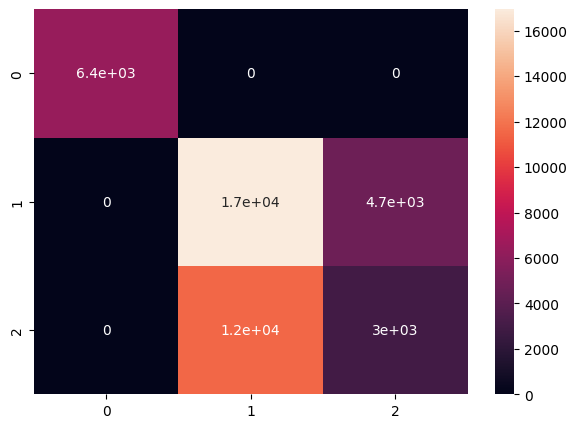

In [34]:
plt.figure(figsize=(7, 5))
# sns.heatmap(conf_matrix_risk, annot=True, fmt='d', cmap='Blues')
sns.heatmap(confusion_matrix(y_test_risk, predicted_risk_test), annot=True)
plt.show()

For diagnosis

classification report

In [35]:
print("\nClassification Report for thyroid cancer diagnosis predicition:")
print(classification_report(y_test_diag, predicted_diag_test))


Classification Report for thyroid cancer diagnosis predicition:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32640
           1       0.71      0.45      0.55      9899

    accuracy                           0.83     42539
   macro avg       0.78      0.70      0.72     42539
weighted avg       0.82      0.83      0.81     42539



confusion matrix

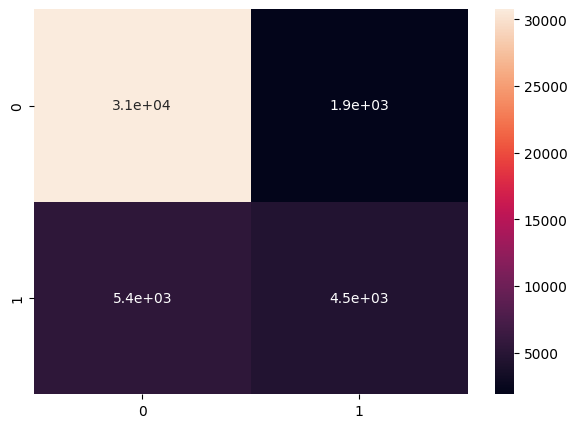

In [36]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test_diag, predicted_diag_test), annot=True)
plt.show()

# **Displaying Ten most important features for thyroid cancer risk**

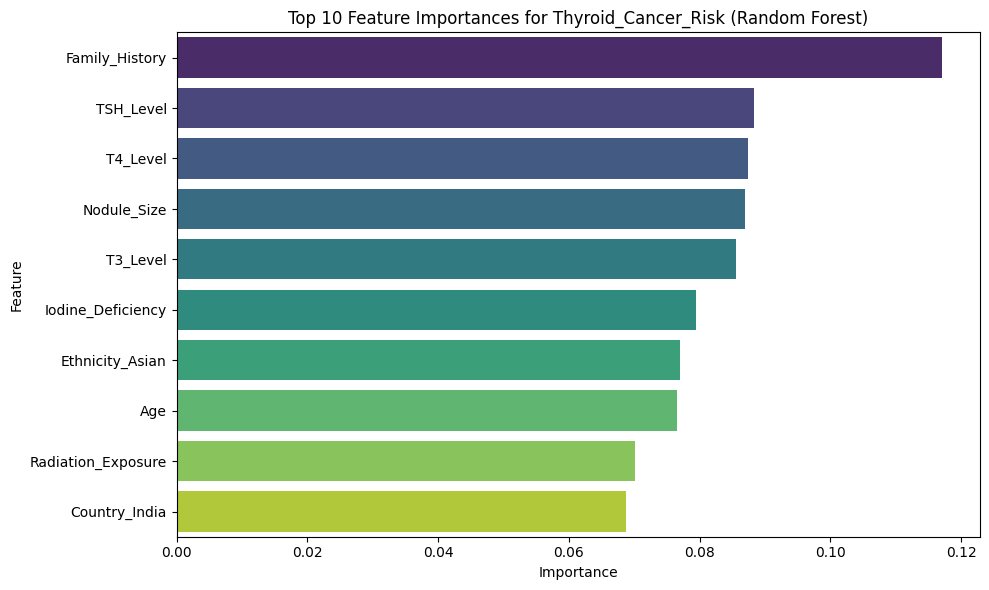

In [37]:
# getting features and importance
feature_names = input_features.columns
importances = rfc_risk.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# displaying 10 most important features features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances for Thyroid_Cancer_Risk (Random Forest)')
plt.tight_layout()
plt.show()


# **Displaying Ten most important features for thyroid cancer Diagnosis**

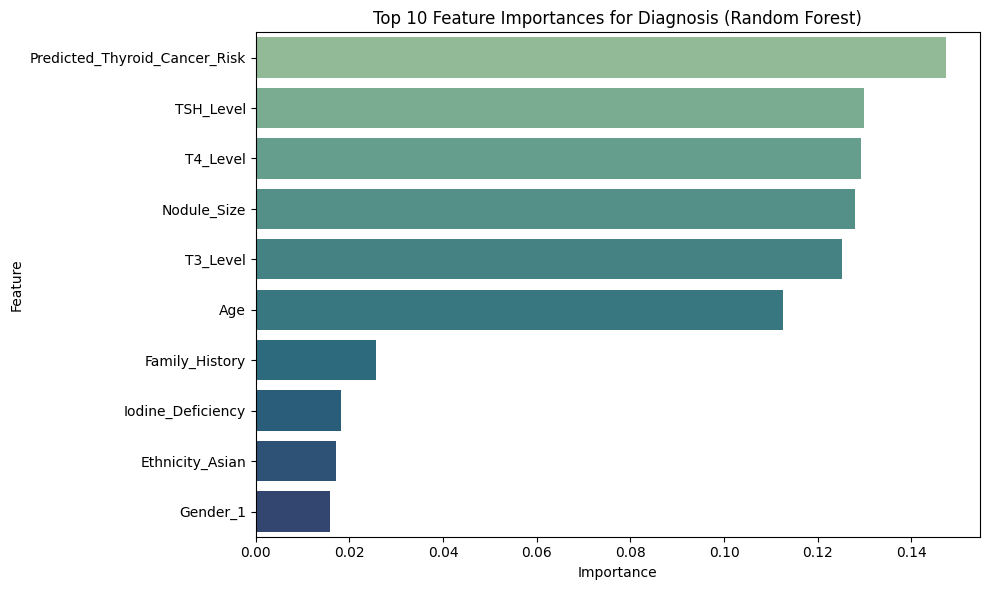

In [38]:
# Create feature names for Diagnosis model and adding a new feature name which is thyroid cancer risk(predicted)
diagnosis_feature_names = list(input_features.columns) + ['Predicted_Thyroid_Cancer_Risk']
importances_diag = rfc_diag.feature_importances_
feature_importance_diag_df = pd.DataFrame({ 'Feature': diagnosis_feature_names, 'Importance': importances_diag })

# Sort by importance
feature_importance_diag_df = feature_importance_diag_df.sort_values(by='Importance', ascending=False)

# displaying 10 most important features features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_diag_df.head(10), palette='crest')
plt.title('Top 10 Feature Importances for Diagnosis (Random Forest)')
plt.tight_layout()
plt.show()
